In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wrangle
import prepare 
import Explore
import evaluate


from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [2]:
#load in data
gpa = pd.read_csv('FirstYearGPA.csv')
gpa = gpa.drop(columns='Unnamed: 0')

In [3]:
gpa

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1
...,...,...,...,...,...,...,...,...,...,...
214,3.13,3.41,700,690,1,10.0,19.0,0,1,1
215,2.88,3.58,680,740,0,20.0,3.0,0,0,1
216,2.65,3.15,590,750,1,8.5,8.5,0,1,1
217,2.97,3.09,670,630,0,12.0,4.0,0,1,1


In [4]:
#make sure this data is clean
gpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GPA           219 non-null    float64
 1   HSGPA         219 non-null    float64
 2   SATV          219 non-null    int64  
 3   SATM          219 non-null    int64  
 4   Male          219 non-null    int64  
 5   HU            219 non-null    float64
 6   SS            219 non-null    float64
 7   FirstGen      219 non-null    int64  
 8   White         219 non-null    int64  
 9   CollegeBound  219 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 17.2 KB


In [5]:
gpa.describe()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,3.096164,3.452740,605.068493,634.292237,0.465753,13.108219,7.248858,0.114155,0.789954,0.922374
std,0.465476,0.374794,83.393452,75.235572,0.499969,7.224647,5.000315,0.318728,0.408274,0.268194
min,1.930000,2.340000,260.000000,430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.745000,3.170000,565.000000,580.000000,0.000000,8.000000,3.000000,0.000000,1.000000,1.000000
50%,3.150000,3.500000,610.000000,640.000000,0.000000,13.000000,6.000000,0.000000,1.000000,1.000000
75%,3.480000,3.760000,670.000000,690.000000,1.000000,17.000000,11.000000,0.000000,1.000000,1.000000
max,4.150000,4.000000,740.000000,800.000000,1.000000,40.000000,21.000000,1.000000,1.000000,1.000000


In [6]:
#gpa and sat scores are 2 different units of measure, this data should be scaled. 

In [7]:
#no nulls
gpa.isna().sum()

GPA             0
HSGPA           0
SATV            0
SATM            0
Male            0
HU              0
SS              0
FirstGen        0
White           0
CollegeBound    0
dtype: int64

In [8]:
#split data ###dropping catagoricals, too skewed####
train, validate, test = wrangle.split_for_model(gpa.drop(columns=['FirstGen','White','CollegeBound']))

train(122, 7),validate(53, 7),test(44, 7)


In [9]:
#scale data
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test, scale_type='MinMax')

In [10]:
train_scaled.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS
0,0.236715,0.951807,0.750000,0.729730,1.0,0.200,0.142857
1,0.516908,0.819277,0.750000,0.837838,1.0,0.175,0.857143
2,0.574879,0.548193,0.812500,0.567568,0.0,0.250,0.142857
3,0.661836,0.734940,0.916667,0.567568,1.0,0.250,0.476190
4,0.371981,0.548193,0.791667,0.567568,1.0,0.225,0.809524


In [11]:
#lets plot some correlation graphs

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


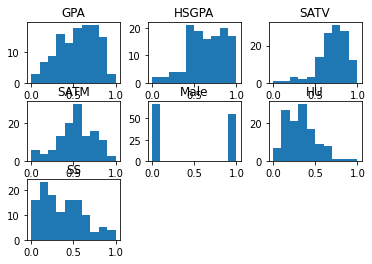

In [12]:
Explore.get_distribution(train_scaled)

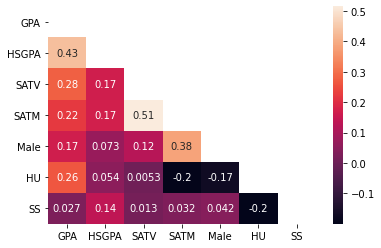

In [13]:
Explore.get_heatmap(train_scaled)

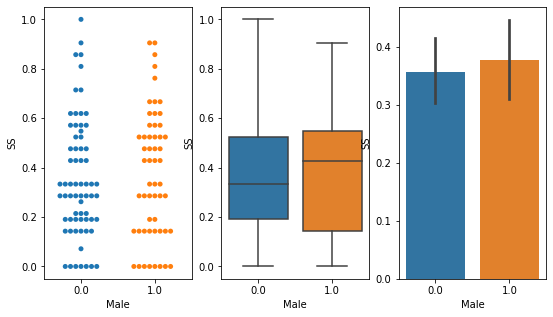

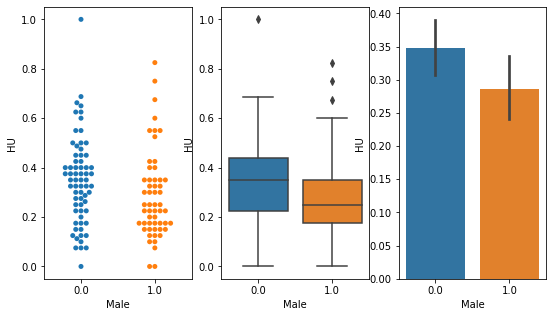

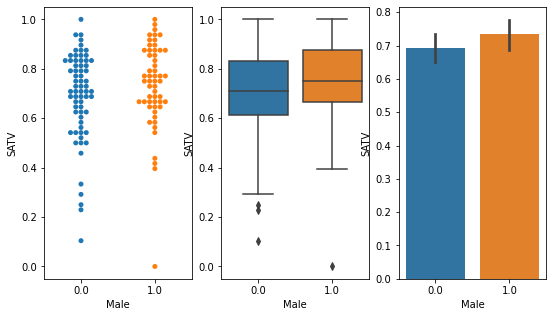

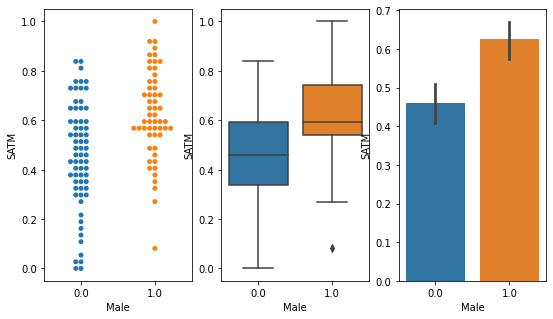

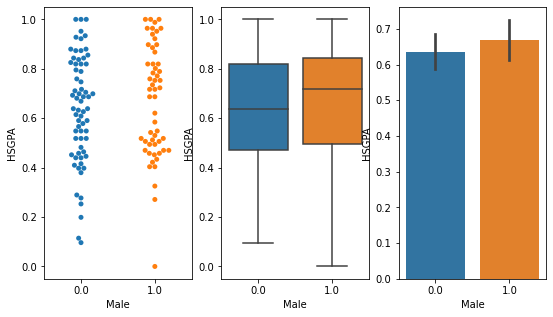

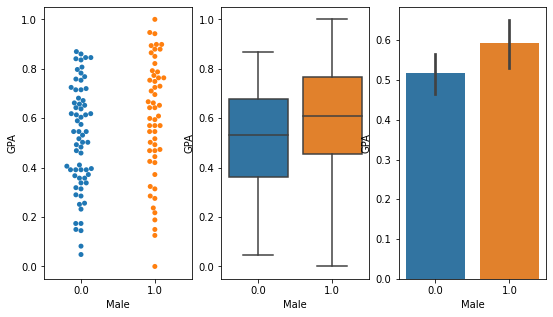

In [14]:
catvars = ['Male']
contvars = ['SS', 'HU','SATV','SATM', 'HSGPA', 'GPA']
Explore.plot_cat_and_cont(catvars, contvars, train_scaled )

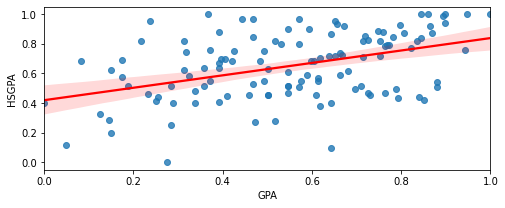

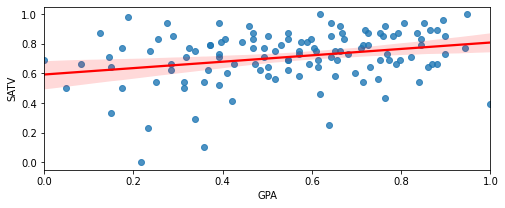

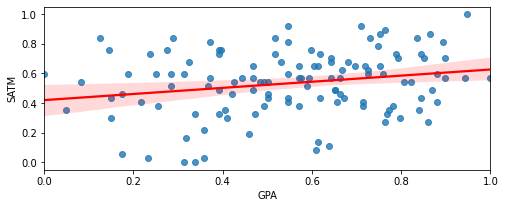

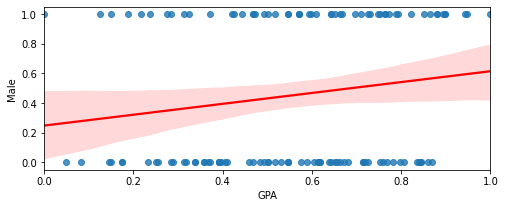

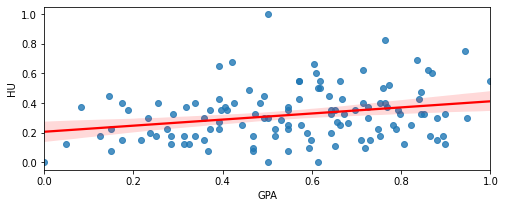

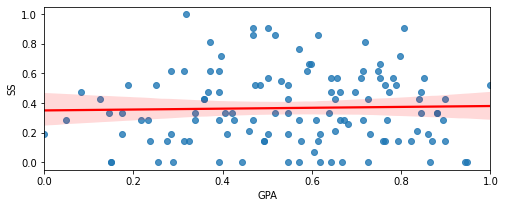

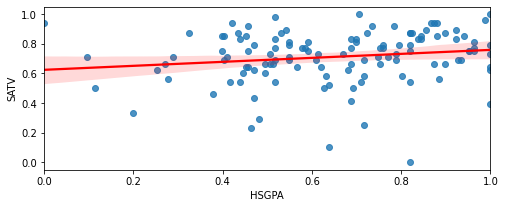

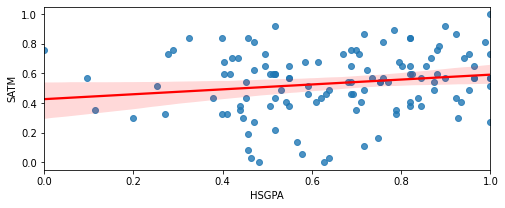

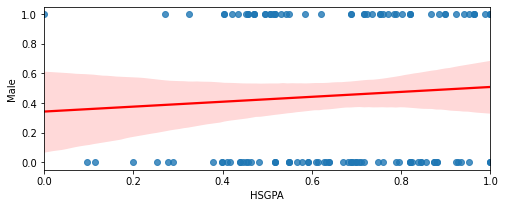

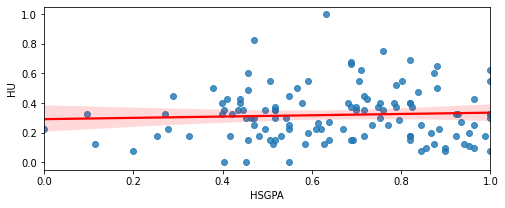

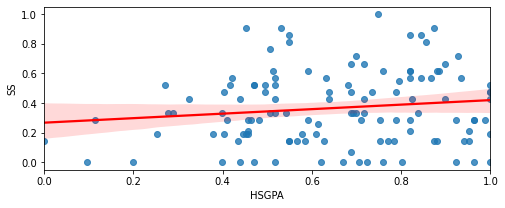

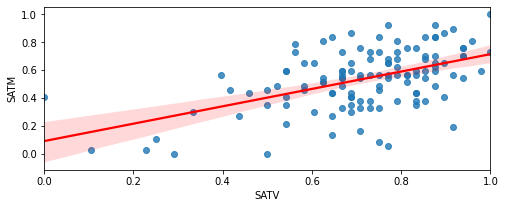

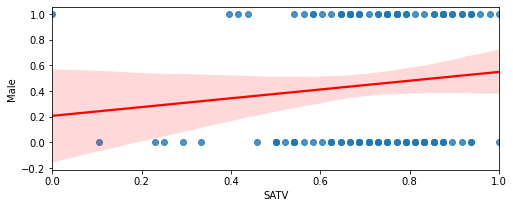

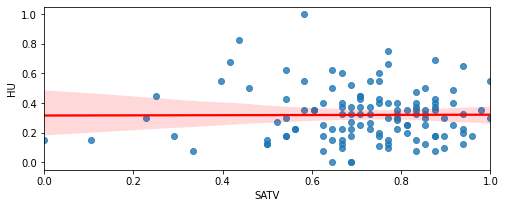

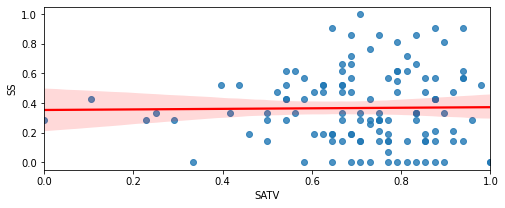

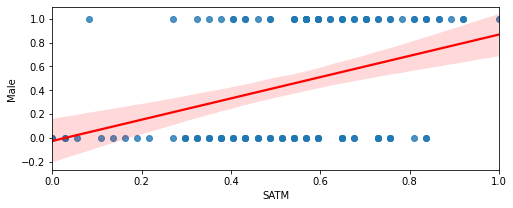

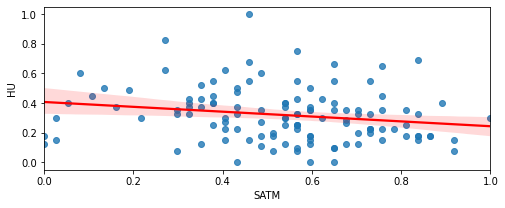

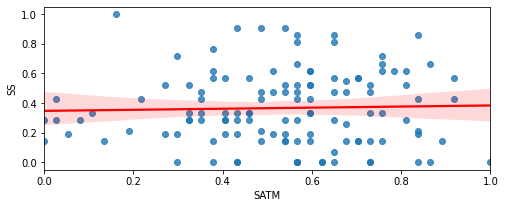

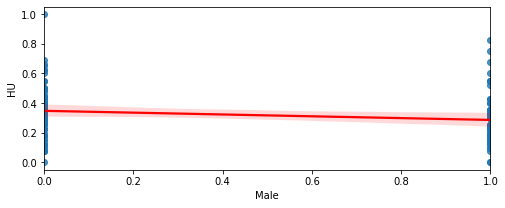

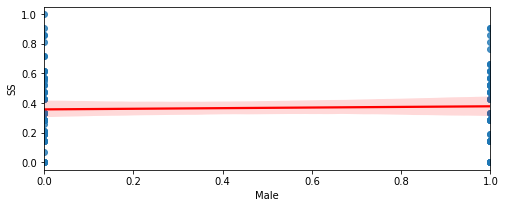

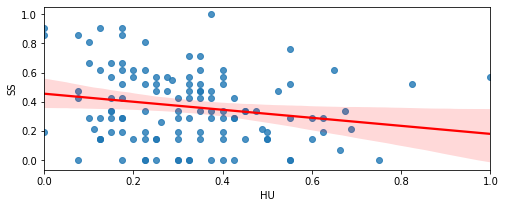

In [15]:
Explore.plot_variable_pairs(train_scaled)

In [16]:
#selecting drivers 
evaluate.select_kbest(train_scaled.drop(columns='GPA'), train.GPA, top=3)

['HSGPA', 'SATV', 'HU']

In [17]:
evaluate.select_rfe(train_scaled.drop(columns='GPA'), train.GPA, n_features_to_select=3)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


['HSGPA', 'SATV', 'HU']

In [18]:
train.columns

Index(['GPA', 'HSGPA', 'SATV', 'SATM', 'Male', 'HU', 'SS'], dtype='object')

In [19]:
#Baseline 

#RMSE of both mean and median
rmse_train_mean = evaluate.baseline_errors(train.GPA, measure = 'Mean')[2]
rmse_validate_mean = evaluate.baseline_errors(validate.GPA, measure = "Mean")[2]

rmse_train_median    = evaluate.baseline_errors(train.GPA, measure = 'Median')[2]
rmse_validate_median = evaluate.baseline_errors(validate.GPA, measure = 'Median')[2]

In [20]:
rmse_train_mean, rmse_validate_mean

(0.47016293412793425, 0.4809385478337673)

In [21]:
rmse_train_median, rmse_validate_median

(0.47159478299092994, 0.4860060563331005)

In [22]:
#lets go with mean baseline

In [23]:
#model time
#make these dataframes only include predictors
X_train = train_scaled.drop(columns=['GPA','SATM','Male','SS'])
y_train = train.GPA
X_validate = validate_scaled.drop(columns=['GPA','SATM','Male','SS'])
y_validate = validate.GPA
X_test = test_scaled.drop(columns=['GPA','SATM','Male','SS'])
y_test = test.GPA


y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [24]:
#linear regression
lm_train_results = y_train.copy()
lm_validate_results = y_validate.copy()


lm = LinearRegression(normalize=True)
lm.fit(X_train, lm_train_results)

lm_train_results['pred'] = lm.predict(X_train)
lm_validate_results['pred'] = lm.predict(X_validate)

lm_train_results = evaluate.get_risiduals(lm_train_results, lm_train_results.GPA, lm_train_results.pred)
lm_validate_results = evaluate.get_risiduals(lm_validate_results, lm_validate_results.GPA, lm_validate_results.pred)

lm_train_rmse = evaluate.regression_errors(lm_train_results.GPA, lm_train_results.pred)[2]
lm_train_r2 = evaluate.regression_errors(lm_train_results.GPA, lm_train_results.pred)[5]

lm_validate_rmse = evaluate.regression_errors(lm_validate_results.GPA, lm_validate_results.pred)[2]
lm_validate_r2 = evaluate.regression_errors(lm_validate_results.GPA, lm_validate_results.pred)[5]

In [25]:
lm_train_rmse, lm_train_r2

(0.39696726800284055, 0.28712625366162847)

In [26]:
lm_validate_rmse, lm_validate_r2

(0.3801608136487797, 0.3484174322826721)

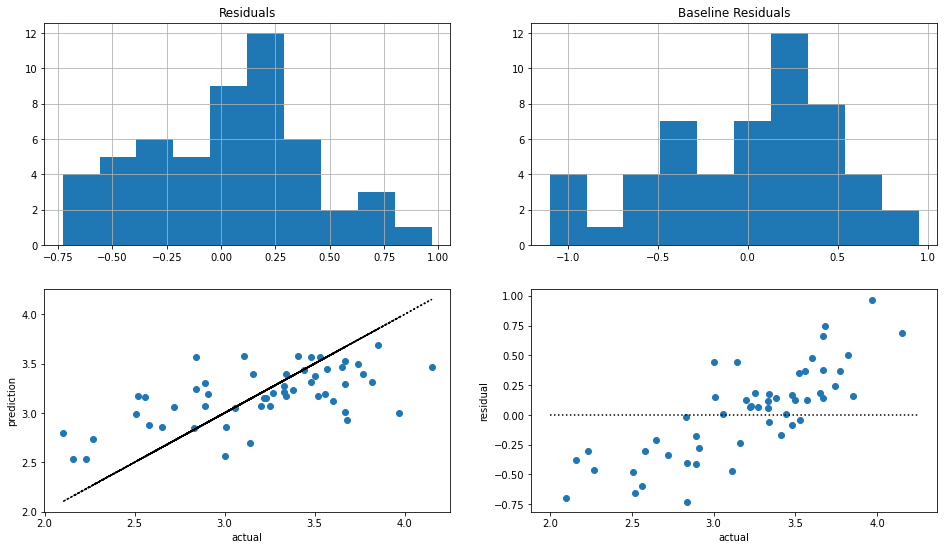

In [27]:
evaluate.plot_residuals(lm_validate_results.GPA, lm_validate_results.pred, lm_validate_results.risiduals, lm_validate_results.baseline_risiduals)

In [216]:
#Lasso Lars
lasso_train_results = y_train.copy()
lasso_validate_results = y_validate.copy()

lasso = LassoLars(alpha=.004)
lasso.fit(X_train, lasso_train_results)

lasso_train_results['pred'] = lasso.predict(X_train)
lasso_validate_results['pred'] = lasso.predict(X_validate)

lasso_train_results = evaluate.get_risiduals(lasso_train_results, lasso_train_results.GPA, lasso_train_results.pred)
lasso_validate_results = evaluate.get_risiduals(lasso_validate_results, lasso_validate_results.GPA, lasso_validate_results.pred)

lasso_train_rmse = evaluate.regression_errors(lasso_train_results.GPA, lasso_train_results.pred)[2]
lasso_train_r2 = evaluate.regression_errors(lasso_train_results.GPA, lasso_train_results.pred)[5]

lasso_validate_rmse = evaluate.regression_errors(lasso_validate_results.GPA, lasso_validate_results.pred)[2]
lasso_validate_r2 = evaluate.regression_errors(lasso_validate_results.GPA, lasso_validate_results.pred)[5]

In [217]:
lasso_train_rmse, lasso_train_r2

(0.40334914881090933, 0.1533072674100925)

In [218]:
lasso_validate_rmse, lasso_validate_r2

(0.39417923042174535, 0.18967580161927816)

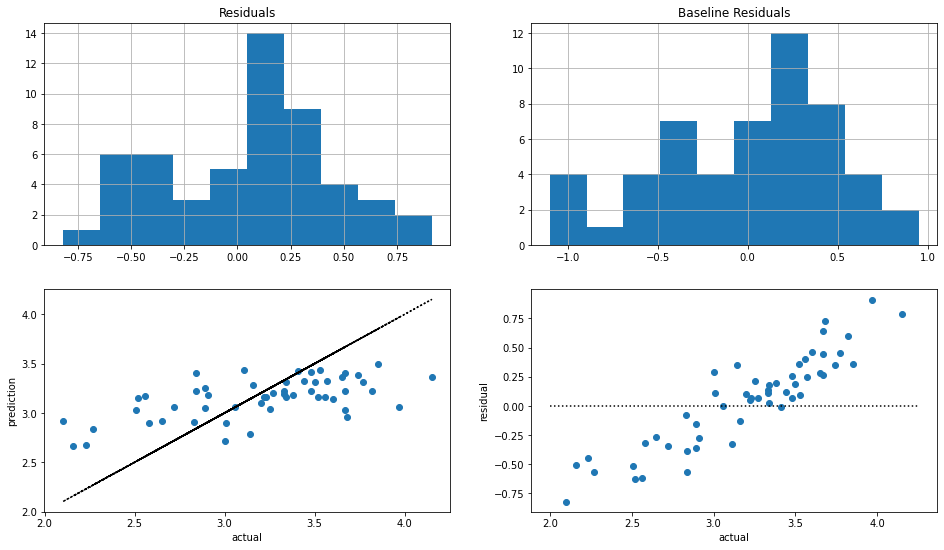

In [219]:
evaluate.plot_residuals(lasso_validate_results.GPA, lasso_validate_results.pred, lasso_validate_results.risiduals, lasso_validate_results.baseline_risiduals)

In [313]:
#GLM
glm_train_results = y_train.copy()
glm_validate_results = y_validate.copy()

glm = TweedieRegressor(power=1, alpha=0)
glm.fit(X_train, glm_train_results.GPA)

glm_train_results['pred'] = glm.predict(X_train)
glm_validate_results['pred'] = glm.predict(X_validate)

glm_train_results = evaluate.get_risiduals(glm_train_results, glm_train_results.GPA, glm_train_results.pred)
glm_validate_results = evaluate.get_risiduals(glm_validate_results, glm_validate_results.GPA, glm_validate_results.pred)

glm_train_rmse = evaluate.regression_errors(glm_train_results.GPA, glm_train_results.pred)[2]
glm_train_r2 = evaluate.regression_errors(glm_train_results.GPA, glm_train_results.pred)[5]

glm_validate_rmse = evaluate.regression_errors(glm_validate_results.GPA, glm_validate_results.pred)[2]
glm_validate_r2 = evaluate.regression_errors(glm_validate_results.GPA, glm_validate_results.pred)[5]

In [314]:
glm_train_rmse, glm_train_r2

(0.39724347288193795, 0.2878735042118007)

In [315]:
glm_validate_rmse, glm_validate_r2

(0.38216085206310657, 0.37001863570558163)

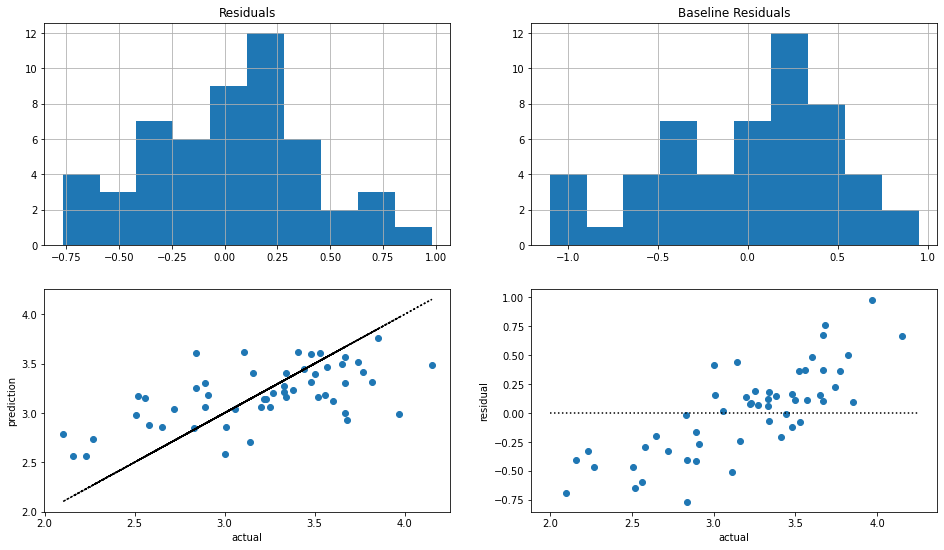

In [316]:
evaluate.plot_residuals(glm_validate_results.GPA, glm_validate_results.pred, glm_validate_results.risiduals, glm_validate_results.baseline_risiduals)

In [317]:
evaluate.better_than_baseline(lm_validate_results.GPA, lm_validate_results.pred)

True

In [318]:
evaluate.better_than_baseline(lasso_validate_results.GPA, lasso_validate_results.pred)

True

In [319]:
evaluate.better_than_baseline(glm_validate_results.GPA, glm_validate_results.pred)

True

In [320]:
#linear regression is best. lets test
test_results = y_test.copy()
test_results['pred'] = lm.predict(X_test)

test_results = evaluate.get_risiduals(test_results, test_results.GPA, test_results.pred)

test_rmse = evaluate.regression_errors(test_results.GPA, test_results.pred)[2]
test_r2 = evaluate.regression_errors(test_results.GPA, test_results.pred)[5]


In [321]:
test_rmse , test_r2

(0.36420677337430885, 0.4461456908723784)

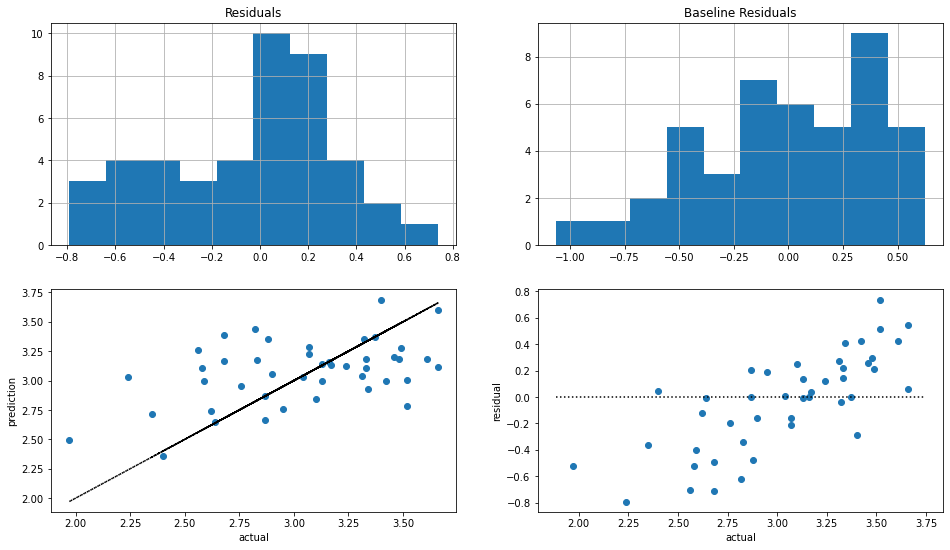

In [322]:
evaluate.plot_residuals(test_results.GPA, test_results.pred, test_results.risiduals, test_results.baseline_risiduals)